## <div align="center"> ECO4199: SPECIAL TOPICS III </div>
### <div align="center"> Data Science for Social Scientists  </div>
## <div align="center"> Assignment 3 </div>
### <div align="center">Charie Brady</div>
### <div align="center">300043672</div>

# INTRODUCTION

<b> The dataset: </b>

For this assignment, I will be analyzing the fatality of car accidents in Canada. 
The dataset can be found here: https://www.kaggle.com/tbsteal/canadian-car-accidents-19942014. It includes data on car accidents that occurred in Canada from 1999 to 2014. 
Variables include the date, vehicle type, weather conditions, driver characteristics, and severity of injury caused to persons involved. 

<b> The prediction task: </b>

The learning will focus on car accident injury and whether features like the weather conditions, vehicle type, or driver characteristics such as gender or age, are predictive of how severely persons involved in accidents are injured in Canada.

<b> Packages used: </b>

In [1]:
import pandas as pd
import numpy as np
from collections import Counter
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
pd.set_option('display.max_columns', None)

# PART I - Data cleaning and exploratory data analysis

In [2]:
# Import data

df = pd.read_csv("NCDB_1999_to_2014.csv")

c:\users\16136\appdata\local\programs\python\python39\lib\site-packages\IPython\core\interactiveshell.py:3165: DtypeWarning: Columns (1,2,5,12) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [3]:
df

,C_YEAR,C_MNTH,C_WDAY,C_HOUR,C_SEV,C_VEHS,C_CONF,C_RCFG,C_WTHR,C_RSUR,C_RALN,C_TRAF,V_ID,V_TYPE,V_YEAR,P_ID,P_SEX,P_AGE,P_PSN,P_ISEV,P_SAFE,P_USER
0,1999,1,1,20,2,02,34,UU,1,5,3,03,01,06,1990,01,M,41,11,1,UU,1
1,1999,1,1,20,2,02,34,UU,1,5,3,03,02,01,1987,01,M,19,11,1,UU,1
2,1999,1,1,20,2,02,34,UU,1,5,3,03,02,01,1987,02,F,20,13,2,02,2
3,1999,1,1,08,2,01,01,UU,5,3,6,18,01,01,1986,01,M,46,11,1,UU,1
4,1999,1,1,08,2,01,01,UU,5,3,6,18,99,NN,NNNN,01,M,05,99,2,UU,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5860400,2014,UU,U,UU,2,UU,UU,01,U,U,U,UU,13,07,UUUU,01,M,24,11,1,NN,1
5860401,2014,UU,U,23,2,01,06,05,1,1,U,18,1,14,2006,01,M,29,96,2,09,5
5860402,2014,UU,U,14,2,01,02,01,1,5,4,18,1,01,2006,01,F,UU,11,2,01,1
5860403,2014,UU,U,22,1,01,06,01,2,4,Q,18,1,22,UUUU,01,M,67,12,3,01,U


In [4]:
# Reduced data set: only last five years

#df_5yr = df[df['C_YEAR'] > 2009]
#df_5yr

In [5]:
df.shape

(5860405, 22)

In [6]:
# Distribution of records by year 

Counter(df["C_YEAR"])

Counter({1999: 413509,
         2000: 422075,
         2001: 409389,
         2002: 420008,
         2003: 407036,
         2004: 389050,
         2005: 386470,
         2006: 378523,
         2007: 368507,
         2008: 338268,
         2009: 330771,
         2010: 334555,
         2011: 325153,
         2012: 322421,
         2013: 317058,
         2014: 297612})

<b>Variable description:</b> 

C_YEAR: Year 

C_MNTH: Month

C_WDAY: Day of week

C_HOUR: Collision hour

C_SEV: Collision severity

C_VEHS: Number of vehicles involved in collision

C_CONF: Collision configuration

C_RCFG: Roadway configuration

C_WTHR: Weather condition

C_RSUR: Road surface

C_RALN: Road alignment 

C_TRAF: Traffic control 

V_ID: Vehicle sequence number 

V_TYPE: Vehicle type - DROP 

V_YEAR: Vehicle model year 

P_ID: Person sequence number

P_SEX: Person sex

P_AGE: Person age

P_PSN: Person position

P_ISEV: Medical treatment required

P_SAFE: Safety device used

P_USER: Road user class 

In [7]:
# Convert all 'object' columns to string data type at first

for col in df: 
    df[col] = df[col].astype(str)

In [8]:
# Base descriptions of data set

display(df.info())
display(df.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5860405 entries, 0 to 5860404
Data columns (total 22 columns):
 #   Column  Dtype 
---  ------  ----- 
 0   C_YEAR  object
 1   C_MNTH  object
 2   C_WDAY  object
 3   C_HOUR  object
 4   C_SEV   object
 5   C_VEHS  object
 6   C_CONF  object
 7   C_RCFG  object
 8   C_WTHR  object
 9   C_RSUR  object
 10  C_RALN  object
 11  C_TRAF  object
 12  V_ID    object
 13  V_TYPE  object
 14  V_YEAR  object
 15  P_ID    object
 16  P_SEX   object
 17  P_AGE   object
 18  P_PSN   object
 19  P_ISEV  object
 20  P_SAFE  object
 21  P_USER  object
dtypes: object(22)
memory usage: 983.6+ MB


None

,C_YEAR,C_MNTH,C_WDAY,C_HOUR,C_SEV,C_VEHS,C_CONF,C_RCFG,C_WTHR,C_RSUR,C_RALN,C_TRAF,V_ID,V_TYPE,V_YEAR,P_ID,P_SEX,P_AGE,P_PSN,P_ISEV,P_SAFE,P_USER
count,5860405,5860405,5860405,5860405,5860405,5860405,5860405,5860405,5860405,5860405,5860405,5860405,5860405,5860405,5860405,5860405,5860405,5860405,5860405,5860405,5860405,5860405
unique,16,15,8,25,2,73,20,12,9,11,8,19,91,20,116,98,4,101,16,5,10,6
top,2000,8,5,16,2,2,21,02,1,1,1,18,01,01,UUUU,01,M,UU,11,2,02,1
freq,422075,547045,999725,519601,5761772,1853859,1771212,2746752,4074538,3846162,4162359,3068048,2000007,4827390,324122,4170908,3170244,377140,3926086,3073431,4163903,3658827


### Look at the target variable ('P_ISEV' = Injury severity of persons involved)

In [9]:
# Frequency counts

Counter(df['P_ISEV'])

Counter({'1': 2375208, '2': 3073431, '3': 40354, 'U': 80701, 'N': 290711})

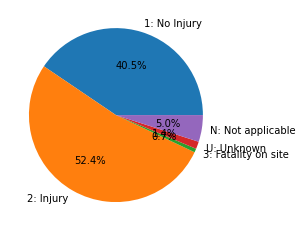

In [10]:
# Visualize frequency count 

y = np.array([2375208, 3073431, 40354, 80701, 290711])
mylabels = ["1: No Injury", "2: Injury", "3: Fatality on site", "U: Unknown", "N: Not applicable"]

plt.pie(y, labels = mylabels,  autopct='%1.1f%%')
plt.show() 

### Fix categorical variables with high cardinality

In [11]:
# Check distribution of C_TRAF
# Decision: recategorize to 'No Control Present', 'Traffic Signals Fully Operational', 'Stop/Yield/Pedestrian Sign', 'Other', UU, XX

Counter(df['C_TRAF'])

Counter({'03': 650008,
         '18': 3068048,
         '01': 1628309,
         'UU': 223483,
         '06': 45600,
         '10': 2924,
         '05': 4199,
         '04': 89688,
         '11': 3421,
         'QQ': 82018,
         '07': 2419,
         '08': 24479,
         '16': 817,
         '17': 3969,
         '02': 19114,
         '13': 4298,
         '15': 3852,
         '09': 550,
         '12': 3209})

In [12]:
def conditions(row):
    if (row['C_TRAF'] == '01'):
        val =  'traffic_signals_operational'
    elif (row['C_TRAF'] == '18'):
        val = 'no_control_present'
    elif (row['C_TRAF'] == '03') or (row['C_TRAF'] == '04') or (row['C_TRAF'] == '06'):
        val = 'stop_yield_pedestrian_sign'
    elif (row['C_TRAF'] == 'UU') or (row['C_TRAF'] == 'XX'):
        val = row['C_TRAF']    
    else:
        val = 'other'
    return val

df['Traffic_Conditions'] = df.apply(conditions, axis=1)

In [13]:
df = df.drop(['C_TRAF'], axis=1)
Counter(df['Traffic_Conditions'])

Counter({'stop_yield_pedestrian_sign': 785296,
         'no_control_present': 3068048,
         'traffic_signals_operational': 1628309,
         'UU': 223483,
         'other': 155269})

In [14]:
# Check distribution of V_TYPE (Decision: will drop this variable because 82% are passenger vehicles, the rest are disbursed sparsely)

Counter(df['V_TYPE'])

Counter({'06': 175491,
         '01': 4827390,
         'NN': 227913,
         '11': 51260,
         'UU': 29754,
         '20': 7635,
         '17': 122907,
         '07': 88057,
         '08': 70556,
         'QQ': 25444,
         '09': 20914,
         '22': 4583,
         '14': 122734,
         '23': 3075,
         '05': 66106,
         '16': 9722,
         '19': 2001,
         '18': 3132,
         '10': 906,
         '21': 825})

In [15]:
# Dropping P_ID, V_ID, and V_TYPE because the cardinality is too high and/or the distribution is highly imbalanced 

df = df.drop(['P_ID', 'V_ID', 'V_TYPE'], axis=1)

In [16]:
# Distribution of dependent variable: C_SEV
# 1 = one or more fatalities, 2 = no fatalities 

Counter(df['C_SEV'])

Counter({'2': 5761772, '1': 98633})

In [17]:
# Check distribution of C_HOUR 
# Decision: Categorize into 6 bins: '1am - 4am', '5am - 8am', '9am - 12pm', '1pm - 4pm', '5pm - 8pm', '9pm - 12am'

Counter(df['C_HOUR'])

Counter({'20': 217277,
         '08': 302834,
         '17': 500203,
         '15': 492742,
         '14': 397342,
         '01': 73383,
         '11': 301916,
         '13': 367315,
         '19': 281863,
         '16': 519601,
         '09': 227626,
         '02': 77500,
         '18': 375902,
         '12': 368278,
         '10': 248984,
         '23': 127698,
         '00': 88481,
         '06': 106086,
         '07': 207965,
         '21': 204317,
         'UU': 59409,
         '05': 44952,
         '22': 164878,
         '03': 64036,
         '04': 39817})

In [18]:
def conditions(row):
    if (row['C_HOUR'] == '01') or (row['C_HOUR'] == '02') or (row['C_HOUR'] == '03') or (row['C_HOUR'] == '04'):
        val =  '1am_4am'
    elif (row['C_HOUR'] == '05') or (row['C_HOUR'] == '06') or (row['C_HOUR'] == '07') or (row['C_HOUR'] == '08'):
        val =  '5am_8am'
    elif (row['C_HOUR'] == '09') or (row['C_HOUR'] == '10') or (row['C_HOUR'] == '11') or (row['C_HOUR'] == '12'):
        val =  '9am_12pm'
    elif (row['C_HOUR'] == '13') or (row['C_HOUR'] == '14') or (row['C_HOUR'] == '15') or (row['C_HOUR'] == '16'):
        val =  '1pm_4pm' 
    elif (row['C_HOUR'] == '17') or (row['C_HOUR'] == '18') or (row['C_HOUR'] == '19') or (row['C_HOUR'] == '20'):
        val =  '5pm_8pm' 
    elif (row['C_HOUR'] == '21') or (row['C_HOUR'] == '22') or (row['C_HOUR'] == '23') or (row['C_HOUR'] == '00'):
        val =  '9pm_12am'
    else:
        val = row['C_HOUR']
    return val

df['Collision_Time'] = df.apply(conditions, axis=1)

In [19]:
# Drop old variable, show frequency count of new variable

df = df.drop(['C_HOUR'], axis=1)
Counter(df['Collision_Time'])

Counter({'5pm_8pm': 1375245,
         '5am_8am': 661837,
         '1pm_4pm': 1777000,
         '1am_4am': 254736,
         '9am_12pm': 1146804,
         '9pm_12am': 585374,
         'UU': 59409})

In [20]:
# Check distribution of P_SAFE 
# Decision: Categorize into 02: 'Safety device used or child restraint used', 01, 13: 'No safety device used or no child restraint used', 09, 10, 11, 12, NN: 'Other safety device used or not applicable', UU, XX

Counter(df['P_SAFE'])

Counter({'UU': 615188,
         '02': 4163903,
         'NN': 571946,
         '01': 198606,
         '13': 148730,
         '12': 18322,
         '09': 96437,
         'QQ': 47150,
         '10': 112,
         '11': 11})

In [21]:
def conditions(row):
    if row['P_SAFE'] == '02':
        val =  'safety_device_used'
    elif (row['P_SAFE'] == '01') or (row['P_SAFE'] == '13'):
        val =  'no_safety_device_used'
    elif (row['P_SAFE'] == '09') or (row['P_SAFE'] == '10') or (row['P_SAFE'] == '11') or (row['P_SAFE'] == '12') or (row['P_SAFE'] == 'NN'):
        val =  'other_safety_device_used_or_NA'
    else:
        val = row['P_SAFE']
    return val

df['Safety_Device_Used'] = df.apply(conditions, axis=1)

In [22]:
# Drop old variable, show frequency count of new variable

df = df.drop(['P_SAFE'], axis=1)
Counter(df['Safety_Device_Used'])

Counter({'UU': 615188,
         'safety_device_used': 4163903,
         'other_safety_device_used_or_NA': 686828,
         'no_safety_device_used': 347336,
         'QQ': 47150})

In [23]:
# Check distribution of V_YEAR
# Decision: turn into integer type for age of vehicle (C_YEAR - V_YEAR)

Counter(df['V_YEAR'])

Counter({'1990': 159421,
         '1987': 82980,
         '1986': 69722,
         'NNNN': 260256,
         '1984': 32451,
         '1991': 169021,
         '1992': 192313,
         '1997': 262438,
         '1993': 186598,
         '1985': 46251,
         '1988': 121781,
         '1994': 194099,
         '1995': 225404,
         '1998': 295311,
         '1989': 139738,
         'UUUU': 324122,
         '1996': 198814,
         '1983': 19099,
         '1999': 287640,
         '1965': 415,
         '1977': 4567,
         '1978': 5990,
         '1968': 743,
         '1981': 17290,
         '1979': 8611,
         '1976': 2872,
         '1972': 1409,
         '2000': 323183,
         '1982': 13869,
         '1975': 2210,
         '1973': 1491,
         '1974': 1641,
         '1980': 11839,
         '1967': 678,
         '1970': 973,
         '1971': 855,
         '1962': 168,
         '1969': 920,
         '1966': 505,
         '1945': 21,
         '1963': 177,
         '1960': 122,
        

In [24]:
def conditions(row):
    if (row['V_YEAR'] == 'UUUU') or (row['V_YEAR'] == 'NNNN'):
        val = row['V_YEAR']
    else:
        val = str(np.absolute(int(row['C_YEAR']) - int(row['V_YEAR'])))
    return val

df['Vehicle_Age'] = df.apply(conditions, axis=1)

In [25]:
# Drop old variable, show frequency count of new variable

df = df.drop(['V_YEAR'], axis=1)
#Counter(df['Vehicle_Age'])

In [26]:
# Check distribution of P_PSN
# Decision: recategorize sparse categories into larger groups

Counter(df['P_PSN'])

Counter({'11': 3926086,
         '13': 884534,
         '99': 208888,
         '23': 258122,
         '98': 6658,
         '21': 215997,
         '22': 90317,
         '12': 87671,
         'QQ': 25862,
         '96': 43850,
         '32': 30092,
         'UU': 57662,
         'NN': 14153,
         '31': 4566,
         '33': 5756,
         '97': 191})

In [27]:
def conditions(row):
    if (row['P_PSN'] == '11'):
        val = 'driver'
    elif (row['P_PSN'] == '12'):
        val = 'frontrow_center'
    elif (row['P_PSN'] == '13'):
        val = 'frontrow_rightoutboard'
    elif (row['P_PSN'] == '21'):
        val = 'secondrow_leftoutboard'
    elif (row['P_PSN'] == '22'):
        val = 'secondrow_center'
    elif (row['P_PSN'] == '23'):
        val = 'secondrow_rightoutboard'
    elif (row['P_PSN'] == '31') or (row['P_PSN'] == '32') or (row['P_PSN'] == '33'):
        val = 'thirdrow'
    elif (row['P_PSN'] == '96') or (row['P_PSN'] == '97') or (row['P_PSN'] == '98'):
        val = 'other_passenger'  
    elif (row['P_PSN'] == '99'):
        val = 'pedestrian'
    else:
        val = row['P_PSN']
    return val

df['Passenger_Position'] = df.apply(conditions, axis=1)

In [28]:
df = df.drop(['P_PSN'], axis=1)
Counter(df['Passenger_Position'])

Counter({'driver': 3926086,
         'frontrow_rightoutboard': 884534,
         'pedestrian': 208888,
         'secondrow_rightoutboard': 258122,
         'other_passenger': 50699,
         'secondrow_leftoutboard': 215997,
         'secondrow_center': 90317,
         'frontrow_center': 87671,
         'QQ': 25862,
         'thirdrow': 40414,
         'UU': 57662,
         'NN': 14153})

In [29]:
# Check distribution of C_RCFG
# Decision: recategorize sparse categories into larger groups

Counter(df['C_RCFG'])

Counter({'UU': 504648,
         'QQ': 144298,
         '01': 2079515,
         '02': 2746752,
         '03': 289184,
         '05': 51196,
         '04': 23723,
         '06': 6001,
         '08': 11780,
         '07': 1009,
         '09': 1743,
         '10': 556})

In [30]:
def conditions(row):
    if (row['C_RCFG'] == '01'):
        val = 'non_intersection'
    elif (row['C_RCFG'] == '02'):
        val = 'intersection_two_public_roadway'
    elif (row['C_RCFG'] == '03'):
        val = 'intersection_parking_or_private_driveway'
    elif (row['C_RCFG'] == 'QQ') or (row['C_RCFG'] == 'UU') or (row['C_RCFG'] == 'XX'):
        val = row['C_RCFG']
    else:
        val = 'other_roadway_config'
    return val

df['Roadway'] = df.apply(conditions, axis=1)

In [31]:
df = df.drop(['C_RCFG'], axis=1)
Counter(df['Roadway'])

Counter({'UU': 504648,
         'QQ': 144298,
         'non_intersection': 2079515,
         'intersection_two_public_roadway': 2746752,
         'intersection_parking_or_private_driveway': 289184,
         'other_roadway_config': 96008})

### Fix missing values

In [32]:
# Checking for missing values (Null values, and Unknown values, which either start with a 'U', 'Q', 'X', or 'N' in this data set)

def count_missing(table, col):
    count_null = table[col].isna().sum()
    percent_null = round(count_null / len(table)*100, 1)
    count_unknown = table[col].str.contains(r'U|X|Q|N').sum()
    percent_unknown = round(count_unknown / len(table)*100, 1)
    print("Null values: ", count_null, " -- ", percent_null, "% -- Unknown values: ", count_unknown, " -- ", percent_unknown, "% -- ", col)
    
for col in df: 
    count_missing(df, col)

Null values:  0  --  0.0 % -- Unknown values:  0  --  0.0 % --  C_YEAR
Null values:  0  --  0.0 % -- Unknown values:  385  --  0.0 % --  C_MNTH
Null values:  0  --  0.0 % -- Unknown values:  1323  --  0.0 % --  C_WDAY
Null values:  0  --  0.0 % -- Unknown values:  0  --  0.0 % --  C_SEV
Null values:  0  --  0.0 % -- Unknown values:  541  --  0.0 % --  C_VEHS
Null values:  0  --  0.0 % -- Unknown values:  463999  --  7.9 % --  C_CONF
Null values:  0  --  0.0 % -- Unknown values:  102988  --  1.8 % --  C_WTHR
Null values:  0  --  0.0 % -- Unknown values:  248668  --  4.2 % --  C_RSUR
Null values:  0  --  0.0 % -- Unknown values:  463312  --  7.9 % --  C_RALN
Null values:  0  --  0.0 % -- Unknown values:  249740  --  4.3 % --  P_SEX
Null values:  0  --  0.0 % -- Unknown values:  395156  --  6.7 % --  P_AGE
Null values:  0  --  0.0 % -- Unknown values:  371412  --  6.3 % --  P_ISEV
Null values:  0  --  0.0 % -- Unknown values:  175586  --  3.0 % --  P_USER
Null values:  0  --  0.0 % -- Unk

In [33]:
# Remove all Unknown values

for col in df: 
    index = df[ df[col].str.contains(r'U|X|Q|N')].index
    df.drop(index, inplace=True)

In [34]:
# Check that all columns contain zero Uknown values

for col in df: 
    count_missing(df, col)

Null values:  0  --  0.0 % -- Unknown values:  0  --  0.0 % --  C_YEAR
Null values:  0  --  0.0 % -- Unknown values:  0  --  0.0 % --  C_MNTH
Null values:  0  --  0.0 % -- Unknown values:  0  --  0.0 % --  C_WDAY
Null values:  0  --  0.0 % -- Unknown values:  0  --  0.0 % --  C_SEV
Null values:  0  --  0.0 % -- Unknown values:  0  --  0.0 % --  C_VEHS
Null values:  0  --  0.0 % -- Unknown values:  0  --  0.0 % --  C_CONF
Null values:  0  --  0.0 % -- Unknown values:  0  --  0.0 % --  C_WTHR
Null values:  0  --  0.0 % -- Unknown values:  0  --  0.0 % --  C_RSUR
Null values:  0  --  0.0 % -- Unknown values:  0  --  0.0 % --  C_RALN
Null values:  0  --  0.0 % -- Unknown values:  0  --  0.0 % --  P_SEX
Null values:  0  --  0.0 % -- Unknown values:  0  --  0.0 % --  P_AGE
Null values:  0  --  0.0 % -- Unknown values:  0  --  0.0 % --  P_ISEV
Null values:  0  --  0.0 % -- Unknown values:  0  --  0.0 % --  P_USER
Null values:  0  --  0.0 % -- Unknown values:  0  --  0.0 % --  Traffic_Conditio

In [35]:
df.shape

(3262105, 19)

After removing all unknown values, 58% of the original dataset remains. A dataset with ~3.4 million records is still plenty of data to train the models. 

### Convert target variable to binary format

In [36]:
# Frequency counts

Counter(df['P_ISEV'])

Counter({'2': 1818029, '1': 1424439, '3': 19637})

In [37]:
# Fix P_ISEV variable to binary (0 = '1' No Injury, 1 = '2' or '3' Injury (including fatality) or if C_SEV = '1' has fatality)

df['Injury'] = np.where(np.logical_or(df['P_ISEV']>'1', df['C_SEV'] == '1'), 1, 0)


In [38]:
Counter(df['Injury'])

Counter({1: 1848254, 0: 1413851})

In [39]:
# Dropping C_SEV and P_ISEV now that information is reflected in Injury target variable

df = df.drop(['P_ISEV', 'C_SEV'], axis=1)

### Convert numeric values to int64 data type and binary to 0,1 encoding 

In [40]:
# Convert month to numeric and add season variable

df['C_MNTH'] = df['C_MNTH'].astype(int)

In [41]:
# Add Season variable 

def conditions(row):
    if (row['C_MNTH'] == 12) or (row['C_MNTH'] == 1) or (row['C_MNTH'] == 2):
        val =  'winter'
    elif (row['C_MNTH'] == 3) or (row['C_MNTH'] == 4) or (row['C_MNTH'] == 5):
        val =  'spring'
    elif (row['C_MNTH'] == 6) or (row['C_MNTH'] == 7) or (row['C_MNTH'] == 8):
        val =  'summer'
    else:
        val = 'fall'
    return val

df['Season'] = df.apply(conditions, axis=1)

In [42]:
# Convert to numeric: C_VEHS, P_AGE, C_YEAR

df['C_VEHS'] = df['C_VEHS'].astype(float).astype(int)
df['P_AGE'] = df['P_AGE'].astype(int)
df['C_YEAR'] = df['C_YEAR'].astype(int)
df['Vehicle_Age'] = df['Vehicle_Age'].astype(int)

In [43]:
# Change P_SEX to binary encoding (0 = male, 1 = female)

df['P_SEX'] = np.where(df['P_SEX']=='F', 1, 0)

In [44]:
# Final cleaned dataset 

df

,C_YEAR,C_MNTH,C_WDAY,C_VEHS,C_CONF,C_WTHR,C_RSUR,C_RALN,P_SEX,P_AGE,P_USER,Traffic_Conditions,Collision_Time,Safety_Device_Used,Vehicle_Age,Passenger_Position,Roadway,Injury,Season
52,1999,1,1,2,34,1,1,1,1,33,1,traffic_signals_operational,9am_12pm,safety_device_used,7,driver,intersection_two_public_roadway,1,winter
54,1999,1,1,2,34,1,1,1,1,70,1,traffic_signals_operational,9am_12pm,safety_device_used,7,driver,intersection_two_public_roadway,0,winter
125,1999,1,1,1,03,1,1,3,1,38,1,other,5pm_8pm,safety_device_used,11,driver,intersection_parking_or_private_driveway,1,winter
141,1999,1,1,2,01,3,2,4,0,34,1,no_control_present,5am_8am,safety_device_used,4,driver,intersection_two_public_roadway,0,winter
142,1999,1,1,2,01,3,2,4,0,30,2,no_control_present,5am_8am,safety_device_used,4,frontrow_rightoutboard,intersection_two_public_roadway,0,winter
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5860376,2014,12,7,2,41,1,5,1,0,44,1,no_control_present,1pm_4pm,safety_device_used,6,driver,non_intersection,0,winter
5860377,2014,12,7,2,41,1,5,1,0,34,2,no_control_present,1pm_4pm,safety_device_used,6,frontrow_rightoutboard,non_intersection,1,winter
5860378,2014,12,7,1,03,1,3,4,1,35,1,no_control_present,5pm_8pm,safety_device_used,13,driver,non_intersection,1,winter
5860379,2014,12,7,1,03,1,3,4,0,26,2,no_control_present,5pm_8pm,safety_device_used,13,frontrow_rightoutboard,non_intersection,0,winter


In [45]:
df2 = df.drop(columns=['C_YEAR', 'C_MNTH','C_VEHS', 'P_SEX', 'P_AGE', 'Injury', 'Vehicle_Age'])
display(df.info())
display(df2.describe())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3262105 entries, 52 to 5860380
Data columns (total 19 columns):
 #   Column              Dtype 
---  ------              ----- 
 0   C_YEAR              int32 
 1   C_MNTH              int32 
 2   C_WDAY              object
 3   C_VEHS              int32 
 4   C_CONF              object
 5   C_WTHR              object
 6   C_RSUR              object
 7   C_RALN              object
 8   P_SEX               int32 
 9   P_AGE               int32 
 10  P_USER              object
 11  Traffic_Conditions  object
 12  Collision_Time      object
 13  Safety_Device_Used  object
 14  Vehicle_Age         int32 
 15  Passenger_Position  object
 16  Roadway             object
 17  Injury              int32 
 18  Season              object
dtypes: int32(7), object(12)
memory usage: 410.7+ MB


None

,C_WDAY,C_CONF,C_WTHR,C_RSUR,C_RALN,P_USER,Traffic_Conditions,Collision_Time,Safety_Device_Used,Passenger_Position,Roadway,Season
count,3262105,3262105,3262105,3262105,3262105,3262105,3262105,3262105,3262105,3262105,3262105,3262105
unique,7,18,7,9,6,4,4,6,2,8,4,4
top,5,21,1,1,1,1,no_control_present,1pm_4pm,safety_device_used,driver,intersection_two_public_roadway,summer
freq,556975,1143614,2310985,2204006,2541770,2180556,1741404,1002176,3119420,2187367,1731338,886112


In [46]:
# select only last five years.

df = df[df['C_YEAR'].isin([2014])] #2010, 2011, 2012, 2013, 

In [47]:
df.shape

(163064, 19)

## Description of data cleaning and exploratory data analysis

- Feature engineering: Did you drop some observations or variables? Why? Did you create new variables?

I decided to drop observations from 1999-2009 and will use only data from 2010-2014, which is still 933,528 observations. Otherwise, training on ~3.5 million observations will be time consuming. A few variables were dropped, including the year and the day of the week of the collision since the frequency for both were fairly evenly distributed. 

Note: This has been updated to only 2014 with 163,063 observations, to see if this fixes issues with training the models below. 

Since several categorical variables had high cardinalities, which many values sparsely represented, I combined some into a smaller number of categories. For instance, hour of day the collision occurred was grouped in 4 hour timeframes ('1am - 4am', '5am - 8am', '9am - 12pm', '1pm - 4pm', '5pm - 8pm', '9pm - 12am'), since 0 and 23 both corresponded to late at night, the variable is not ordinal. It is easier to encode 6 rather than 24 categories of time. Other variables, such as 'Safety Device Used', 'Roadway', and 'Passenger Position' were grouped into broader categories to avoid excessively large cardinalities with many low frequencies. I also created a 'Seasons' variable based on the month of the collision.

- What does the distribution of your target variable looks like? 

The target variable for this data set is Injury, which is a binary variable for whether the collision caused injury. As can be seen above, the original variable had 3 other categories: 'Fatal' collisions, which I merged with the 'Injury' category, and 'Not applicable' and 'Unknown' collisions, which I removed from the data set. Now, using only 'Injury'/'No injury', there is a roughly 56/44 split.

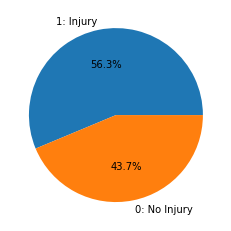

In [48]:
# Visualize frequency count of final target variable

y = np.array([1926360, 1495870])
mylabels = ["1: Injury", "0: No Injury"]

plt.pie(y, labels=mylabels, autopct='%1.1f%%')
plt.show() 

- How are the main inputs related? For instance:

Most the features are categorical for this data set, but there are a few numeric data types: 'P_AGE': the age of the person involved in the collision, 'C_MNTH': the month the collision occurred, 'C_VEHS': the number of vehicles hit, 'Vehicle_Age': age of the person's vehicle. 

Looking at the pair plots for these variables below, there does not appear to be any obvious collinearity between the variables. One interesting observation is that collisions involving large number of vehicles tend to happen in the winter months (11, 12, 1, 2). The vast majority of accidents involve one or two cars, and most vehicles are between less than 25 years old.

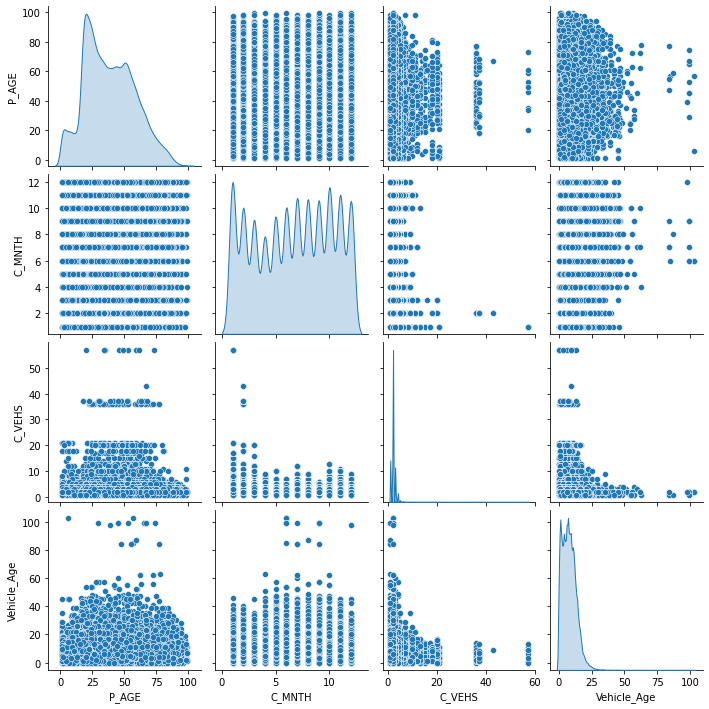

In [49]:
sns.pairplot(df[['P_AGE','C_MNTH','C_VEHS','Vehicle_Age']],diag_kind="kde")

Additionally, all missing values were checked. In this data set, there were no null values. Instead, all unknown variables were labeled as unknown (UU) and not applicable (NN). These records were removed, leaving 58% of the data remaining. Lastly, all data types were converted to their approporiate types (binary, int, string, etc.), and categorical variables will be one-hot-encoded below. 

### One-hot-encoding 

In [50]:
# save cleaned data before one-hot-encoding.
df.to_csv("cleaned_accident_data.csv")

# import 
#df = pd.read_csv("cleaned_accident_data.csv")
#del df['Unnamed: 0']

df

,C_YEAR,C_MNTH,C_WDAY,C_VEHS,C_CONF,C_WTHR,C_RSUR,C_RALN,P_SEX,P_AGE,P_USER,Traffic_Conditions,Collision_Time,Safety_Device_Used,Vehicle_Age,Passenger_Position,Roadway,Injury,Season
5562822,2014,1,1,1,03,5,5,5,0,19,1,no_control_present,9pm_12am,safety_device_used,6,driver,intersection_parking_or_private_driveway,1,winter
5562823,2014,1,1,2,41,1,3,1,1,19,1,no_control_present,5pm_8pm,safety_device_used,7,driver,intersection_parking_or_private_driveway,1,winter
5562824,2014,1,1,2,41,1,3,1,0,22,1,no_control_present,5pm_8pm,safety_device_used,8,driver,intersection_parking_or_private_driveway,0,winter
5562825,2014,1,1,3,35,2,2,1,0,33,1,stop_yield_pedestrian_sign,9am_12pm,safety_device_used,0,driver,intersection_two_public_roadway,1,winter
5562826,2014,1,1,3,35,2,2,1,1,33,2,stop_yield_pedestrian_sign,9am_12pm,safety_device_used,0,frontrow_rightoutboard,intersection_two_public_roadway,1,winter
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5860376,2014,12,7,2,41,1,5,1,0,44,1,no_control_present,1pm_4pm,safety_device_used,6,driver,non_intersection,0,winter
5860377,2014,12,7,2,41,1,5,1,0,34,2,no_control_present,1pm_4pm,safety_device_used,6,frontrow_rightoutboard,non_intersection,1,winter
5860378,2014,12,7,1,03,1,3,4,1,35,1,no_control_present,5pm_8pm,safety_device_used,13,driver,non_intersection,1,winter
5860379,2014,12,7,1,03,1,3,4,0,26,2,no_control_present,5pm_8pm,safety_device_used,13,frontrow_rightoutboard,non_intersection,0,winter


In [51]:
# one-hot-encode categorical columns 

df = pd.get_dummies(df,columns=["Season"],drop_first=True)  # <--- drop first to avoid multicollinearity
df = pd.get_dummies(df, columns=["C_CONF","C_WTHR","C_RSUR","C_RALN","P_USER","Traffic_Conditions",
                                      "Collision_Time","Safety_Device_Used","Passenger_Position","Roadway"])

# drop day of the week and year columns 

del df['C_WDAY']
del df['C_YEAR']

In [52]:
df

,C_MNTH,C_VEHS,P_SEX,P_AGE,Vehicle_Age,Injury,Season_spring,Season_summer,Season_winter,C_CONF_01,C_CONF_02,C_CONF_03,C_CONF_04,C_CONF_05,C_CONF_06,C_CONF_21,C_CONF_22,C_CONF_23,C_CONF_24,C_CONF_25,C_CONF_31,C_CONF_32,C_CONF_33,C_CONF_34,C_CONF_35,C_CONF_36,C_CONF_41,C_WTHR_1,C_WTHR_2,C_WTHR_3,C_WTHR_4,C_WTHR_5,C_WTHR_6,C_WTHR_7,C_RSUR_1,C_RSUR_2,C_RSUR_3,C_RSUR_4,C_RSUR_5,C_RSUR_6,C_RSUR_7,C_RSUR_8,C_RSUR_9,C_RALN_1,C_RALN_2,C_RALN_3,C_RALN_4,C_RALN_5,C_RALN_6,P_USER_1,P_USER_2,P_USER_4,P_USER_5,Traffic_Conditions_no_control_present,Traffic_Conditions_other,Traffic_Conditions_stop_yield_pedestrian_sign,Traffic_Conditions_traffic_signals_operational,Collision_Time_1am_4am,Collision_Time_1pm_4pm,Collision_Time_5am_8am,Collision_Time_5pm_8pm,Collision_Time_9am_12pm,Collision_Time_9pm_12am,Safety_Device_Used_no_safety_device_used,Safety_Device_Used_safety_device_used,Passenger_Position_driver,Passenger_Position_frontrow_center,Passenger_Position_frontrow_rightoutboard,Passenger_Position_other_passenger,Passenger_Position_secondrow_center,Passenger_Position_secondrow_leftoutboard,Passenger_Position_secondrow_rightoutboard,Passenger_Position_thirdrow,Roadway_intersection_parking_or_private_driveway,Roadway_intersection_two_public_roadway,Roadway_non_intersection,Roadway_other_roadway_config
5562822,1,1,0,19,6,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,1,0,0,0,0,0,0,0,1,0,0,0
5562823,1,2,1,19,7,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,1,0,0,0,0,0,0,0,1,0,0,0
5562824,1,2,0,22,8,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,1,0,0,0,0,0,0,0,1,0,0,0
5562825,1,3,0,33,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,1,0,0,0,0,0,0,0,0,1,0,0
5562826,1,3,1,33,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5860376,12,2,0,44,6,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,1,0
5860377,12,2,0,34,6,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0
5860378,12,1,1,35,13,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,1,0,0,0,0,0,0,0,0,0,1,0
5860379,12,1,0,26,13,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0


# PART II - Statistical modelling

In [53]:
import statsmodels.api as sm
import statsmodels.formula.api as smf
import sklearn.linear_model as skl_lm
import warnings
from statsmodels.tools.sm_exceptions import ConvergenceWarning
warnings.simplefilter('ignore', ConvergenceWarning)

### Split into train and test sets (90/10)

First you should set aside 10% of your data to a test dataset that you should only use at the end to compare the
performance of your models out of sample. (You can for instance use the train test split function from ScikitLearn).

In [54]:
df2 = df.copy()

In [55]:
df2

,C_MNTH,C_VEHS,P_SEX,P_AGE,Vehicle_Age,Injury,Season_spring,Season_summer,Season_winter,C_CONF_01,C_CONF_02,C_CONF_03,C_CONF_04,C_CONF_05,C_CONF_06,C_CONF_21,C_CONF_22,C_CONF_23,C_CONF_24,C_CONF_25,C_CONF_31,C_CONF_32,C_CONF_33,C_CONF_34,C_CONF_35,C_CONF_36,C_CONF_41,C_WTHR_1,C_WTHR_2,C_WTHR_3,C_WTHR_4,C_WTHR_5,C_WTHR_6,C_WTHR_7,C_RSUR_1,C_RSUR_2,C_RSUR_3,C_RSUR_4,C_RSUR_5,C_RSUR_6,C_RSUR_7,C_RSUR_8,C_RSUR_9,C_RALN_1,C_RALN_2,C_RALN_3,C_RALN_4,C_RALN_5,C_RALN_6,P_USER_1,P_USER_2,P_USER_4,P_USER_5,Traffic_Conditions_no_control_present,Traffic_Conditions_other,Traffic_Conditions_stop_yield_pedestrian_sign,Traffic_Conditions_traffic_signals_operational,Collision_Time_1am_4am,Collision_Time_1pm_4pm,Collision_Time_5am_8am,Collision_Time_5pm_8pm,Collision_Time_9am_12pm,Collision_Time_9pm_12am,Safety_Device_Used_no_safety_device_used,Safety_Device_Used_safety_device_used,Passenger_Position_driver,Passenger_Position_frontrow_center,Passenger_Position_frontrow_rightoutboard,Passenger_Position_other_passenger,Passenger_Position_secondrow_center,Passenger_Position_secondrow_leftoutboard,Passenger_Position_secondrow_rightoutboard,Passenger_Position_thirdrow,Roadway_intersection_parking_or_private_driveway,Roadway_intersection_two_public_roadway,Roadway_non_intersection,Roadway_other_roadway_config
5562822,1,1,0,19,6,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,1,0,0,0,0,0,0,0,1,0,0,0
5562823,1,2,1,19,7,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,1,0,0,0,0,0,0,0,1,0,0,0
5562824,1,2,0,22,8,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,1,0,0,0,0,0,0,0,1,0,0,0
5562825,1,3,0,33,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,1,0,0,0,0,0,0,0,0,1,0,0
5562826,1,3,1,33,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5860376,12,2,0,44,6,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,1,0
5860377,12,2,0,34,6,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0
5860378,12,1,1,35,13,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,1,0,0,0,0,0,0,0,0,0,1,0
5860379,12,1,0,26,13,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0


In [56]:
# get labels, remove from features set

labels = df2["Injury"]  
del df2["Injury"]

# get feature values 

#feature_values = df2.values

# split into train and test sets (stratified) 

x_train, x_test, y_train, y_test = train_test_split(df2, labels, test_size = 0.1, shuffle = True, stratify = labels)

### Logistic Regression Models

Using OLS regression and your full training sample, suggests 5 different models that relates your
variables. For instance: With and without interaction term if you expect additivity to not hold, Polynomial of certain inputs you expect to not be linear
- Run these regressions using a package like Statsmodels
(https://www.statsmodels.org/devel/example_formulas.html)
- Based on classical statistics such as the R2
, p-values and so on, discuss which models seems to best fit the
data and select it.

#### Model 1 - All variables in the original data set (no polynomials, no interactions)

In [58]:
# add constant term, then train the model using the entire data set 

x_train2 = sm.add_constant(x_train)

logit_model = sm.Logit(y_train, x_train2)

logit_res = logit_model.fit()

print(logit_res.summary())

Optimization terminated successfully.
         Current function value: 0.632314
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:                 Injury   No. Observations:               146757
Model:                          Logit   Df Residuals:                   146686
Method:                           MLE   Df Model:                           70
Date:                Fri, 17 Dec 2021   Pseudo R-squ.:                 0.07732
Time:                        05:25:00   Log-Likelihood:                -92797.
converged:                       True   LL-Null:                   -1.0057e+05
Covariance Type:            nonrobust   LLR p-value:                     0.000
                                                       coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------------------
const                           

#### Model 2 - Only p < 0.05, add polynomail for P_AGE (since very young and very old passengers are more likely to sustain injury)

In [59]:
df3 = x_train[['C_VEHS','P_SEX','P_AGE','Vehicle_Age', 'Season_spring', 'Season_summer', 'Season_winter']].join(y_train)
df3

,C_VEHS,P_SEX,P_AGE,Vehicle_Age,Season_spring,Season_summer,Season_winter,Injury
5664314,2,0,60,14,1,0,0,0
5776380,2,0,13,4,0,0,0,0
5633303,2,0,40,9,1,0,0,0
5676214,2,1,18,4,0,1,0,1
5650193,3,0,56,9,1,0,0,0
...,...,...,...,...,...,...,...,...
5700808,2,1,52,3,0,1,0,1
5836049,3,0,43,8,0,0,1,1
5566510,2,1,35,18,0,0,1,1
5601645,2,0,47,10,0,0,1,1


In [60]:
# train model

logit_model2 = smf.logit('Injury ~ C_VEHS + P_SEX + P_AGE + I(P_AGE**2) + I(P_AGE**3) + I(P_AGE**4) + I(P_AGE**5) + Vehicle_Age + Season_spring + Season_summer + Season_winter' , data=df3).fit()
print(logit_model2.summary())

Optimization terminated successfully.
         Current function value: 0.657342
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:                 Injury   No. Observations:               146757
Model:                          Logit   Df Residuals:                   146745
Method:                           MLE   Df Model:                           11
Date:                Fri, 17 Dec 2021   Pseudo R-squ.:                 0.04080
Time:                        05:25:44   Log-Likelihood:                -96470.
converged:                       True   LL-Null:                   -1.0057e+05
Covariance Type:            nonrobust   LLR p-value:                     0.000
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept        -1.0947      0.042    -26.098      0.000      -1.177      -1.013
C_VEHS           -0.

#### Model 3 - Add interaction term for P_SEX*P_AGE (since females tend to be smaller which could multiply the effect of age)

In [61]:
# train model

logit_model3 = smf.logit('Injury ~ C_VEHS + P_SEX + P_SEX*P_AGE + P_AGE + I(P_AGE**2) + I(P_AGE**3) + I(P_AGE**4) + Vehicle_Age + Season_spring + Season_summer + Season_winter' , data=df3).fit()
print(logit_model3.summary())

Optimization terminated successfully.
         Current function value: 0.656932
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:                 Injury   No. Observations:               146757
Model:                          Logit   Df Residuals:                   146745
Method:                           MLE   Df Model:                           11
Date:                Fri, 17 Dec 2021   Pseudo R-squ.:                 0.04140
Time:                        05:25:52   Log-Likelihood:                -96409.
converged:                       True   LL-Null:                   -1.0057e+05
Covariance Type:            nonrobust   LLR p-value:                     0.000
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept        -0.9617      0.043    -22.177      0.000      -1.047      -0.877
C_VEHS           -0.

#### Model 4 - All variables to do with weather conditions, time of day, season, etc. 

In [62]:
df4 = x_train[['Season_spring','Season_summer','Season_winter','Collision_Time_1am_4am','Collision_Time_1pm_4pm', 
               'Collision_Time_5am_8am', 'Collision_Time_5pm_8pm','Collision_Time_9am_12pm', 'Collision_Time_9pm_12am', 
               'C_WTHR_1', 'C_WTHR_2', 'C_WTHR_3', 'C_WTHR_4', 'C_WTHR_5', 'C_WTHR_6', 'C_WTHR_7']].join(y_train)
df4

,Season_spring,Season_summer,Season_winter,Collision_Time_1am_4am,Collision_Time_1pm_4pm,Collision_Time_5am_8am,Collision_Time_5pm_8pm,Collision_Time_9am_12pm,Collision_Time_9pm_12am,C_WTHR_1,C_WTHR_2,C_WTHR_3,C_WTHR_4,C_WTHR_5,C_WTHR_6,C_WTHR_7,Injury
5664314,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0
5776380,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0
5633303,1,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0
5676214,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1
5650193,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5700808,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1
5836049,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,1
5566510,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,1
5601645,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,1


In [63]:
# train model

logit_model4 = smf.logit('Injury ~ Season_spring + Season_summer + Season_winter + Collision_Time_1am_4am + Collision_Time_1pm_4pm + Collision_Time_5am_8am + Collision_Time_5pm_8pm + Collision_Time_9am_12pm + Collision_Time_9pm_12am + C_WTHR_1 + C_WTHR_2 + C_WTHR_3 + C_WTHR_4 + C_WTHR_5 + C_WTHR_6 + C_WTHR_7', data=df4).fit()
print(logit_model4.summary())


Optimization terminated successfully.
         Current function value: 0.680286
         Iterations 5
                           Logit Regression Results                           
Dep. Variable:                 Injury   No. Observations:               146757
Model:                          Logit   Df Residuals:                   146740
Method:                           MLE   Df Model:                           16
Date:                Fri, 17 Dec 2021   Pseudo R-squ.:                0.007319
Time:                        05:25:55   Log-Likelihood:                -99837.
converged:                       True   LL-Null:                   -1.0057e+05
Covariance Type:            nonrobust   LLR p-value:                4.919e-304
                              coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------
Intercept                   0.4682   1.36e+05   3.43e-06      1.000   -2.67e+05   

#### Discussion on model outcomes

Models 1 and 4 failed to converge. I could not fix this issue after reading online and trying to suppress warnings. I am not sure if this is something to do with the data being large, or too many categorical variables, but I reduced the data set several times, used different combinations of variables, re-encoded the variables with drop_first=True for the set, nothing seems to work. Unfortunately, I do not have time to keep working on this, so I will focus on the 2nd and 3rd models.

Model 2 shows that the variable P_AGE is indeed nonlinear in its affect on Injury, up until the fifth power. It improves R-squared only slightly compared to a model without polynomial version of P_AGE. Overall, the model is a poor predictor of Injury.

Model 3 shows that an interaction term between P_AGE * P_SEX is statistically significant, given that p < 0.05. Again, though, the overall model is poor performing, and the inclusion of this interaction term does not improve the overall model significantly. 

These models do suggest that a linear functional form may not be well specified. 

# PART III - Subset selection 

Apologies, but I tried this section for a long time without success. I could not figure out how to get this to work with all of the categorical variables I have. I ultimately had to skip this part to submit the assignment before it was possibly not accepted. 

(I did also try the subset selection code, but the code never seemed to finish. I realize halfway through that I may have chosen too large of a data set with too many categorical variables.) 

# PART IV - Advanced statistical learning 

In [83]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.ensemble import RandomForestClassifier
import time
from sklearn.linear_model import Lasso
from numpy import arange
from pandas import read_csv
from sklearn.linear_model import LassoCV
from sklearn.model_selection import RepeatedKFold

- Try two models more advanced than OLS regression (from classes 5, 7, 8 or 9) and use cross-validation
tools to select the best models.
Use advance methods such as Lasso, Ridge, Random Forest etc. (or deep learning if you feel like
it even though we won’t have seen it by the time you submit your work)
Make sure to use cross-validation technique to find the best model

### Random Forest Classifier

In [99]:
start_time = time.time()

print(x_train.shape)

tree_model = RandomForestClassifier(max_depth=10, random_state=1000)       
tree_model.fit(x_train.values,y_train)

print("--- %s seconds ---" % (time.time() - start_time))

(146757, 76)
--- 10.729040622711182 seconds ---


Feature 0 Score: 0.01071, Label: C_MNTH
Feature 1 Score: 0.14249, Label: C_VEHS
Feature 2 Score: 0.18546, Label: P_SEX
Feature 3 Score: 0.09076, Label: P_AGE
Feature 4 Score: 0.01823, Label: Vehicle_Age
Feature 5 Score: 0.00211, Label: Injury
Feature 6 Score: 0.00270, Label: Season_spring
Feature 7 Score: 0.00281, Label: Season_summer
Feature 8 Score: 0.00074, Label: Season_winter
Feature 9 Score: 0.00612, Label: C_CONF_01
Feature 10 Score: 0.03665, Label: C_CONF_02
Feature 11 Score: 0.04830, Label: C_CONF_03
Feature 12 Score: 0.00022, Label: C_CONF_04
Feature 13 Score: 0.02050, Label: C_CONF_05
Feature 14 Score: 0.04667, Label: C_CONF_06
Feature 15 Score: 0.00664, Label: C_CONF_21
Feature 16 Score: 0.00066, Label: C_CONF_22
Feature 17 Score: 0.00065, Label: C_CONF_23
Feature 18 Score: 0.00093, Label: C_CONF_24
Feature 19 Score: 0.00986, Label: C_CONF_25
Feature 20 Score: 0.00070, Label: C_CONF_31
Feature 21 Score: 0.00402, Label: C_CONF_32
Feature 22 Score: 0.00060, Label: C_CONF_33
F

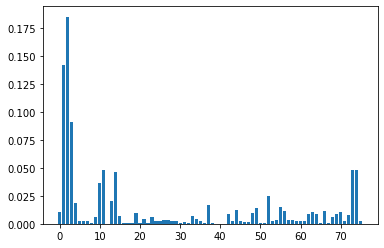

In [100]:
# Visualize feature importance (based on reducing error)

importance = tree_model.feature_importances_

for i,v in enumerate(importance):
    print('Feature %0d Score: %.5f, Label: %s' % (i,v,df.columns[i]))

# plot feature importance
plt.bar([x for x in range(len(importance))], importance)
plt.show()

### LASSO Logistic Regression model

In [80]:
# Standardize values (for LASSO)

scaler = preprocessing.StandardScaler().fit(x_train)
x_train_s = scaler.transform(x_train)
x_train_s.shape

(146757, 76)

In [88]:
# code source: Fabien Forge, Class 7 - Model Selection (lecture notes).  

lambdas = 10**np.linspace(10,-2,100)*0.5
lasso = Lasso()
coefs = []

for 𝜆 in lambdas:
    lasso.set_params(alpha=𝜆)
    lasso.fit(x_train_s, y_train)
    coefs.append(lasso.coef_)
lasso_results=pd.DataFrame(coefs)
lasso_results['Lambda']=lambdas  
lasso_results=pd.melt(lasso_results,id_vars=['Lambda'], var_name='Beta', value_name='Estimate')
lasso_results.head()      

,Lambda,Beta,Estimate
0,5.000000e+09,0,-0.0
1,3.782317e+09,0,-0.0
2,2.861184e+09,0,-0.0
3,2.164381e+09,0,-0.0
4,1.637275e+09,0,-0.0


In [103]:
lasso.coef_

array([-0.00000000e+00, -2.17635800e-02,  8.45769923e-02,  2.22763062e-02,
        1.24999871e-02,  0.00000000e+00, -0.00000000e+00,  0.00000000e+00,
        6.05808603e-03,  0.00000000e+00,  2.95704268e-02,  3.52487231e-02,
        3.10493262e-03, -0.00000000e+00, -2.63665004e-02, -1.47818890e-02,
       -0.00000000e+00, -1.79643916e-03,  2.45439511e-03,  8.05479585e-03,
       -0.00000000e+00,  0.00000000e+00, -3.90364194e-03,  1.09932768e-03,
       -1.27929929e-03,  5.94643858e-03, -0.00000000e+00,  3.05387444e-03,
       -4.72107021e-04,  0.00000000e+00,  0.00000000e+00,  3.45349971e-04,
        0.00000000e+00, -0.00000000e+00, -0.00000000e+00,  5.95713926e-03,
        5.48853849e-04,  1.87094386e-02,  3.59696039e-03,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00, -0.00000000e+00, -0.00000000e+00,
        9.20372007e-03,  0.00000000e+00, -0.00000000e+00,  0.00000000e+00,
        0.00000000e+00, -1.27142209e-02,  4.76311422e-03,  4.62994004e-03,
        1.58754415e-03,  

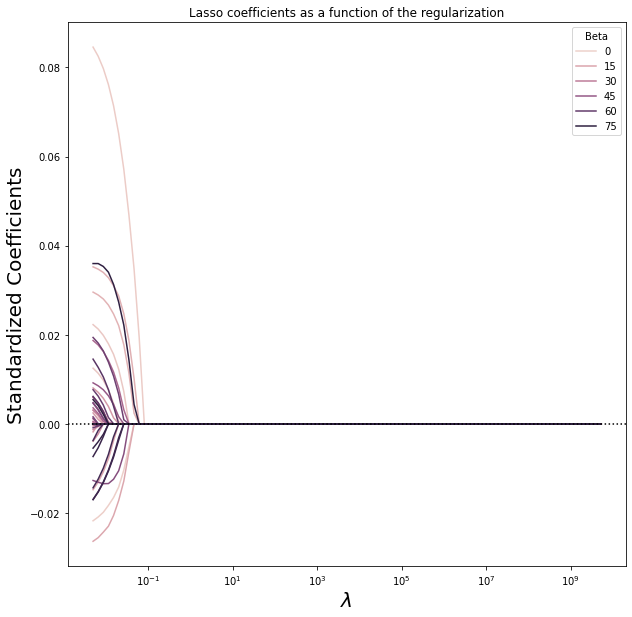

In [89]:
fig, ax = plt.subplots(1,1, figsize=(10,10))
ax = plt.gca()
sns.lineplot(x='Lambda', y='Estimate', hue='Beta',data=lasso_results)
ax.set_xscale('log')
ax.axhline(0,color='k',linestyle=":")
plt.axis('tight')
plt.xlabel(r'$\lambda$', fontsize=20)
plt.ylabel('Standardized Coefficients',fontsize=20)
plt.title('Lasso coefficients as a function of the regularization');

In [91]:
# use automatically configured the lasso regression algorithm

# define model evaluation method
cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)

# define model
model = LassoCV(alphas=arange(0, 1, 0.01), cv=cv, n_jobs=-1)

# fit model
model.fit(x_train, y_train)

# summarize chosen configuration
print('alpha: %f' % model.alpha_)

c:\users\16136\appdata\local\programs\python\python39\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:526: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent_gram(
c:\users\16136\appdata\local\programs\python\python39\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:526: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 14660.340796042365, tolerance: 3.2498487579591084
  model = cd_fast.enet_coordinate_descent_gram(
c:\users\16136\appdata\local\programs\python\python39\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:526: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent_gram(
c:\users\16136\appdata\local\programs\python\python39\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:526: UserWarning: Coo

c:\users\16136\appdata\local\programs\python\python39\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:526: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent_gram(
c:\users\16136\appdata\local\programs\python\python39\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:526: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 14676.877744176054, tolerance: 3.250387881678669
  model = cd_fast.enet_coordinate_descent_gram(
c:\users\16136\appdata\local\programs\python\python39\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:526: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent_gram(
c:\users\16136\appdata\local\programs\python\python39\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:526: ConvergenceWarnin

c:\users\16136\appdata\local\programs\python\python39\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:1349: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  model.fit(X, y)
c:\users\16136\appdata\local\programs\python\python39\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent(


alpha: 0.000000


c:\users\16136\appdata\local\programs\python\python39\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 16301.727098102268, tolerance: 3.6115081679243306
  model = cd_fast.enet_coordinate_descent(


# PART V - Prediction

In [116]:
# Predict using tree model 

p = tree_model.predict(x_test)
print(classification_report(y_test, p)) 

              precision    recall  f1-score   support

           0       0.62      0.53      0.57      7133
           1       0.67      0.75      0.71      9174

    accuracy                           0.65     16307
   macro avg       0.65      0.64      0.64     16307
weighted avg       0.65      0.65      0.65     16307



In [117]:
Counter(p)

Counter({1: 10193, 0: 6114})

In [ ]:
# Calculate MSE

In [123]:
rss = (p-y_test)**2

In [126]:
sum(rss)/len(p)

0.34825535046299133

# CONCLUSION

Overall, the only model capable of predicting Y (Injury) with any amount of accuracy was the Random Forest Classifier. It has a 65% accuracy, which is different from pure chance given that Injury represents 56% of cases. However, this is not much better than a random guess. The f1-score for predicting Injury is 71%. 

Based on the feature importance for this model, a few features are more predictive of Injury in a collision than others, namely the age and sex of the passenger, whether the collision occurred in an intersection or not, the number of vehicles involved in the collision, and the collision configuration, specifically when the collision hits a stationary object (such as a tree). 

Based on the logisitic regression models, P_AGE is a nonlinear variable for Injury, up until degree 4 (i.e. as a person's age increases, Injury becomes far more likely). P_AGE and P_SEX are statistically significant as an interaction term, implying that their effects are not additive. However, the models overall are not very predictive, given their very small R-square. 